# Education

## 1. Education data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
from pyproj import CRS

/opt/anaconda3/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
# Read data
education = pd.read_excel('data/msoa_to_adult_he_2011-30sept.xlsx', 
                           header=[30])

In [3]:
education

,Country,MSOA,Adult HE 2011 Quintile,Population,Graduates,Adult HE Rate
0,Northern Ireland,95AA01S1,3,757,189,0.250
1,Northern Ireland,95AA01S2,4,1393,413,0.296
2,Northern Ireland,95AA01S3,4,1194,375,0.314
3,Northern Ireland,95AA02W1,1,1468,230,0.157
4,Northern Ireland,95AA03W1,1,1436,167,0.116
...,...,...,...,...,...,...
9321,Wales,W02000419,2,8748,1526,0.174
9322,Wales,W02000420,4,11092,3921,0.353
9323,Wales,W02000421,4,9693,3150,0.325
9324,Wales,W02000422,5,5579,3396,0.609


## 2. London MSOA data

In [4]:
# Read London MSOA Geodata
london_areas = gpd.read_file('data/statistical-gis-boundaries-london/ESRI/MSOA_2011_London_gen_MHW.shp')
london_areas.head()

,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ,geometry
0,E02000001,City of London 001,E09000001,City of London,E12000007,London,7375,7187,188,25.5,4385,1.6,"MULTIPOLYGON (((531667.624 180534.992, 531647...."
1,E02000002,Barking and Dagenham 001,E09000002,Barking and Dagenham,E12000007,London,6775,6724,51,31.3,2713,2.5,"POLYGON ((548881.563 190845.265, 548881.125 19..."
2,E02000003,Barking and Dagenham 002,E09000002,Barking and Dagenham,E12000007,London,10045,10033,12,46.9,3834,2.6,"POLYGON ((549102.438 189324.625, 548954.500 18..."
3,E02000004,Barking and Dagenham 003,E09000002,Barking and Dagenham,E12000007,London,6182,5937,245,24.8,2318,2.6,"POLYGON ((551549.998 187364.637, 551478.000 18..."
4,E02000005,Barking and Dagenham 004,E09000002,Barking and Dagenham,E12000007,London,8562,8562,0,72.1,3183,2.7,"POLYGON ((549099.634 187656.076, 549161.375 18..."


In [5]:
# merger with msoa data
edu_map = london_areas.merge(education, 
                             left_on='MSOA11CD', 
                             right_on='MSOA', 
                             how='left')

In [6]:
edu_map

,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ,geometry,Country,MSOA,Adult HE 2011 Quintile,Population,Graduates,Adult HE Rate
0,E02000001,City of London 001,E09000001,City of London,E12000007,London,7375,7187,188,25.5,4385,1.6,"MULTIPOLYGON (((531667.624 180534.992, 531647....",England,E02000001,5,6755,4618,0.684
1,E02000002,Barking and Dagenham 001,E09000002,Barking and Dagenham,E12000007,London,6775,6724,51,31.3,2713,2.5,"POLYGON ((548881.563 190845.265, 548881.125 19...",England,E02000002,2,5024,914,0.182
2,E02000003,Barking and Dagenham 002,E09000002,Barking and Dagenham,E12000007,London,10045,10033,12,46.9,3834,2.6,"POLYGON ((549102.438 189324.625, 548954.500 18...",England,E02000003,3,7798,1829,0.235
3,E02000004,Barking and Dagenham 003,E09000002,Barking and Dagenham,E12000007,London,6182,5937,245,24.8,2318,2.6,"POLYGON ((551549.998 187364.637, 551478.000 18...",England,E02000004,2,4986,891,0.179
4,E02000005,Barking and Dagenham 004,E09000002,Barking and Dagenham,E12000007,London,8562,8562,0,72.1,3183,2.7,"POLYGON ((549099.634 187656.076, 549161.375 18...",England,E02000005,2,6362,1119,0.176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,E02006927,Greenwich 034,E09000011,Greenwich,E12000007,London,8315,8241,74,33.0,3338,2.5,"POLYGON ((541029.881 176265.023, 541101.997 17...",England,E02006927,5,6566,2435,0.371
979,E02006928,Greenwich 035,E09000011,Greenwich,E12000007,London,7341,6410,931,136.0,2977,2.2,"MULTIPOLYGON (((538300.370 177956.632, 538290....",England,E02006928,5,6092,2619,0.430
980,E02006929,Greenwich 036,E09000011,Greenwich,E12000007,London,7490,7489,1,29.4,3333,2.2,"POLYGON ((540054.366 179353.136, 540220.352 17...",England,E02006929,5,6106,2828,0.463
981,E02006930,Greenwich 037,E09000011,Greenwich,E12000007,London,6561,6557,4,75.6,2876,2.3,"POLYGON ((539552.478 178604.042, 539533.000 17...",England,E02006930,5,5567,2946,0.529


In [7]:
edu_map.to_csv("final_data/education_final.csv")

## Plot

<AxesSubplot:title={'center':'Number of adults with highest qualification in London by MSOA'}>

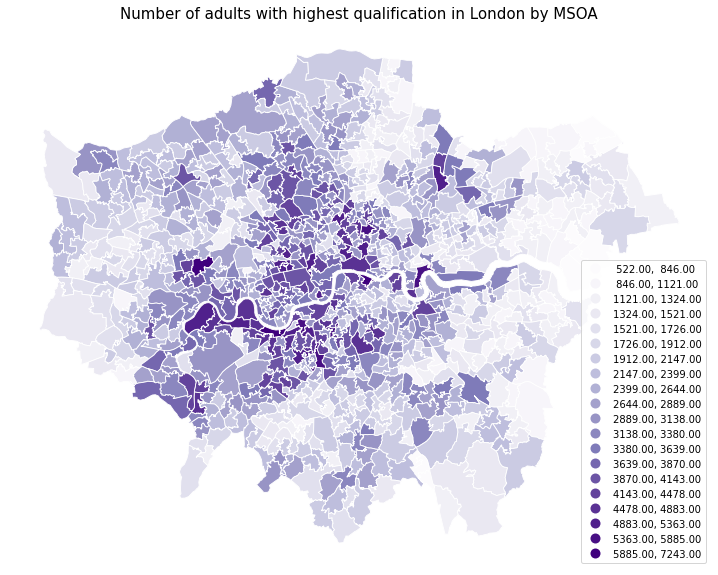

In [8]:
# Plot the map
fig, ax = plt.subplots(1, figsize=(20, 10))
ax.axis('off')
ax.set_title('Number of adults with highest qualification in London by MSOA', fontdict={'fontsize': '15', 'fontweight' : '3'})

edu_map.plot(column='Graduates',
             cmap='Purples',
             linewidth=0.9,
             ax=ax,
             edgecolor='1',
             scheme='NaturalBreaks', 
             k=20,
             legend=True,
             legend_kwds={'loc': 'lower right'})

# Population

## 1. Population data

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
from pyproj import CRS

In [10]:
# Read data
population = pd.read_excel('data/population.xlsx', 
                           sheet_name='Mid-2020 Persons', # the sheet that the data is in
                           header=[4])

/opt/anaconda3/lib/python3.8/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [11]:
population

,MSOA Code,MSOA Name,LA Code (2018 boundaries),LA name (2018 boundaries),LA Code (2021 boundaries),LA name (2021 boundaries),All Ages,0,1,2,...,81,82,83,84,85,86,87,88,89,90+
0,E02002483,Hartlepool 001,E06000001,Hartlepool,E06000001,Hartlepool,10332,131,111,97,...,60,58,57,31,42,45,37,34,29,46
1,E02002484,Hartlepool 002,E06000001,Hartlepool,E06000001,Hartlepool,10440,115,112,119,...,57,43,46,42,42,41,29,23,20,114
2,E02002485,Hartlepool 003,E06000001,Hartlepool,E06000001,Hartlepool,8165,92,99,104,...,46,37,26,42,27,18,20,17,20,40
3,E02002487,Hartlepool 005,E06000001,Hartlepool,E06000001,Hartlepool,5174,56,53,51,...,16,26,16,11,9,9,15,12,10,16
4,E02002488,Hartlepool 006,E06000001,Hartlepool,E06000001,Hartlepool,5894,48,39,53,...,34,32,31,35,27,20,19,14,15,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7196,W02000286,Merthyr Tydfil 004,W06000024,Merthyr Tydfil,W06000024,Merthyr Tydfil,6968,74,68,92,...,41,34,42,37,18,21,22,17,20,39
7197,W02000287,Merthyr Tydfil 005,W06000024,Merthyr Tydfil,W06000024,Merthyr Tydfil,8498,71,69,96,...,41,62,28,37,33,30,29,13,19,48
7198,W02000288,Merthyr Tydfil 006,W06000024,Merthyr Tydfil,W06000024,Merthyr Tydfil,8101,87,78,89,...,62,59,40,53,34,19,19,20,21,66
7199,W02000289,Merthyr Tydfil 007,W06000024,Merthyr Tydfil,W06000024,Merthyr Tydfil,8785,106,112,94,...,35,33,30,36,37,20,28,16,22,55


In [12]:
# select multile columns
population = population[["MSOA Code","MSOA Name","All Ages"]]

In [13]:
population

,MSOA Code,MSOA Name,All Ages
0,E02002483,Hartlepool 001,10332
1,E02002484,Hartlepool 002,10440
2,E02002485,Hartlepool 003,8165
3,E02002487,Hartlepool 005,5174
4,E02002488,Hartlepool 006,5894
...,...,...,...
7196,W02000286,Merthyr Tydfil 004,6968
7197,W02000287,Merthyr Tydfil 005,8498
7198,W02000288,Merthyr Tydfil 006,8101
7199,W02000289,Merthyr Tydfil 007,8785


## 2. London MSOA data

In [14]:
# Read London MSOA Geodata
london_areas = gpd.read_file('data/statistical-gis-boundaries-london/ESRI/MSOA_2011_London_gen_MHW.shp')
london_areas.head()

,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ,geometry
0,E02000001,City of London 001,E09000001,City of London,E12000007,London,7375,7187,188,25.5,4385,1.6,"MULTIPOLYGON (((531667.624 180534.992, 531647...."
1,E02000002,Barking and Dagenham 001,E09000002,Barking and Dagenham,E12000007,London,6775,6724,51,31.3,2713,2.5,"POLYGON ((548881.563 190845.265, 548881.125 19..."
2,E02000003,Barking and Dagenham 002,E09000002,Barking and Dagenham,E12000007,London,10045,10033,12,46.9,3834,2.6,"POLYGON ((549102.438 189324.625, 548954.500 18..."
3,E02000004,Barking and Dagenham 003,E09000002,Barking and Dagenham,E12000007,London,6182,5937,245,24.8,2318,2.6,"POLYGON ((551549.998 187364.637, 551478.000 18..."
4,E02000005,Barking and Dagenham 004,E09000002,Barking and Dagenham,E12000007,London,8562,8562,0,72.1,3183,2.7,"POLYGON ((549099.634 187656.076, 549161.375 18..."


In [15]:
# merger with msoa data
pop_map = london_areas.merge(population, 
                             left_on='MSOA11CD', 
                             right_on='MSOA Code', 
                             how='left')

In [16]:
pop_map

,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ,geometry,MSOA Code,MSOA Name,All Ages
0,E02000001,City of London 001,E09000001,City of London,E12000007,London,7375,7187,188,25.5,4385,1.6,"MULTIPOLYGON (((531667.624 180534.992, 531647....",E02000001,City of London 001,10938
1,E02000002,Barking and Dagenham 001,E09000002,Barking and Dagenham,E12000007,London,6775,6724,51,31.3,2713,2.5,"POLYGON ((548881.563 190845.265, 548881.125 19...",E02000002,Barking and Dagenham 001,7726
2,E02000003,Barking and Dagenham 002,E09000002,Barking and Dagenham,E12000007,London,10045,10033,12,46.9,3834,2.6,"POLYGON ((549102.438 189324.625, 548954.500 18...",E02000003,Barking and Dagenham 002,11246
3,E02000004,Barking and Dagenham 003,E09000002,Barking and Dagenham,E12000007,London,6182,5937,245,24.8,2318,2.6,"POLYGON ((551549.998 187364.637, 551478.000 18...",E02000004,Barking and Dagenham 003,6646
4,E02000005,Barking and Dagenham 004,E09000002,Barking and Dagenham,E12000007,London,8562,8562,0,72.1,3183,2.7,"POLYGON ((549099.634 187656.076, 549161.375 18...",E02000005,Barking and Dagenham 004,10540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,E02006927,Greenwich 034,E09000011,Greenwich,E12000007,London,8315,8241,74,33.0,3338,2.5,"POLYGON ((541029.881 176265.023, 541101.997 17...",E02006927,Greenwich 034,10680
979,E02006928,Greenwich 035,E09000011,Greenwich,E12000007,London,7341,6410,931,136.0,2977,2.2,"MULTIPOLYGON (((538300.370 177956.632, 538290....",E02006928,Greenwich 035,12660
980,E02006929,Greenwich 036,E09000011,Greenwich,E12000007,London,7490,7489,1,29.4,3333,2.2,"POLYGON ((540054.366 179353.136, 540220.352 17...",E02006929,Greenwich 036,13649
981,E02006930,Greenwich 037,E09000011,Greenwich,E12000007,London,6561,6557,4,75.6,2876,2.3,"POLYGON ((539552.478 178604.042, 539533.000 17...",E02006930,Greenwich 037,9263


In [17]:
pop_map.to_csv("final_data/population_final.csv")

## 3. Plot

<AxesSubplot:title={'center':'Poplation in London by MSOA'}>

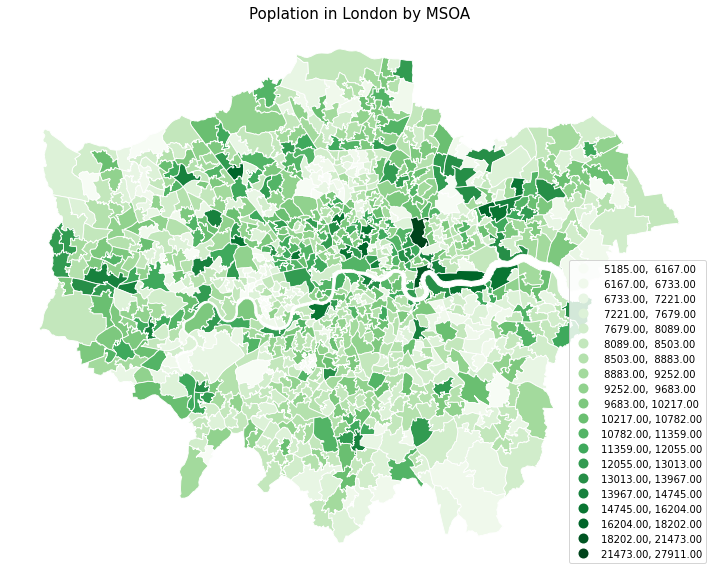

In [18]:
# Plot the map
fig, ax = plt.subplots(1, figsize=(20, 10))
ax.axis('off')
ax.set_title('Poplation in London by MSOA', fontdict={'fontsize': '15', 'fontweight' : '3'})

pop_map.plot(column='All Ages',
             cmap='Greens',
             linewidth=0.9,
             ax=ax,
             edgecolor='1',
             scheme='NaturalBreaks', 
             k=20,
             legend=True,
             legend_kwds={'loc': 'lower right'})

# Income

In [19]:
# Read data
income = pd.read_excel('data/income.xls', 
                       sheet_name='Total annual income', # the sheet that the data is in
                       header=[4])

In [20]:
income

,MSOA code,MSOA name,Local authority code,Local authority name,Region code,Region name,Total annual income (£),Upper confidence limit (£),Lower confidence limit (£),Confidence interval (£)
0,E02004297,County Durham 001,E06000047,County Durham,E12000001,North East,39800,47800,33100,14700
1,E02004290,County Durham 002,E06000047,County Durham,E12000001,North East,42200,50700,35200,15500
2,E02004298,County Durham 003,E06000047,County Durham,E12000001,North East,40100,48000,33400,14600
3,E02004299,County Durham 004,E06000047,County Durham,E12000001,North East,33800,40500,28200,12300
4,E02004291,County Durham 005,E06000047,County Durham,E12000001,North East,33400,40000,27800,12200
...,...,...,...,...,...,...,...,...,...,...
7196,W02000362,Newport 016,W06000022,Newport,W92000004,Wales,47300,57700,38800,18900
7197,W02000363,Newport 017,W06000022,Newport,W92000004,Wales,35800,43600,29500,14100
7198,W02000364,Newport 018,W06000022,Newport,W92000004,Wales,28200,35100,22600,12500
7199,W02000365,Newport 019,W06000022,Newport,W92000004,Wales,35500,43200,29200,14000


In [21]:
# select multile columns
income = income[["MSOA code","MSOA name","Total annual income (£)"]]

In [22]:
income

,MSOA code,MSOA name,Total annual income (£)
0,E02004297,County Durham 001,39800
1,E02004290,County Durham 002,42200
2,E02004298,County Durham 003,40100
3,E02004299,County Durham 004,33800
4,E02004291,County Durham 005,33400
...,...,...,...
7196,W02000362,Newport 016,47300
7197,W02000363,Newport 017,35800
7198,W02000364,Newport 018,28200
7199,W02000365,Newport 019,35500


## London MSOA data

In [23]:
# Read London MSOA Geodata
london_areas = gpd.read_file('data/statistical-gis-boundaries-london/ESRI/MSOA_2011_London_gen_MHW.shp')
london_areas.head()

,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ,geometry
0,E02000001,City of London 001,E09000001,City of London,E12000007,London,7375,7187,188,25.5,4385,1.6,"MULTIPOLYGON (((531667.624 180534.992, 531647...."
1,E02000002,Barking and Dagenham 001,E09000002,Barking and Dagenham,E12000007,London,6775,6724,51,31.3,2713,2.5,"POLYGON ((548881.563 190845.265, 548881.125 19..."
2,E02000003,Barking and Dagenham 002,E09000002,Barking and Dagenham,E12000007,London,10045,10033,12,46.9,3834,2.6,"POLYGON ((549102.438 189324.625, 548954.500 18..."
3,E02000004,Barking and Dagenham 003,E09000002,Barking and Dagenham,E12000007,London,6182,5937,245,24.8,2318,2.6,"POLYGON ((551549.998 187364.637, 551478.000 18..."
4,E02000005,Barking and Dagenham 004,E09000002,Barking and Dagenham,E12000007,London,8562,8562,0,72.1,3183,2.7,"POLYGON ((549099.634 187656.076, 549161.375 18..."


In [24]:
# merger with msoa data
income_map = london_areas.merge(income, 
                                left_on='MSOA11CD', 
                                right_on='MSOA code', 
                                how='left')

In [25]:
income_map

,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ,geometry,MSOA code,MSOA name,Total annual income (£)
0,E02000001,City of London 001,E09000001,City of London,E12000007,London,7375,7187,188,25.5,4385,1.6,"MULTIPOLYGON (((531667.624 180534.992, 531647....",E02000001,City of London 001,65400
1,E02000002,Barking and Dagenham 001,E09000002,Barking and Dagenham,E12000007,London,6775,6724,51,31.3,2713,2.5,"POLYGON ((548881.563 190845.265, 548881.125 19...",E02000002,Barking and Dagenham 001,39000
2,E02000003,Barking and Dagenham 002,E09000002,Barking and Dagenham,E12000007,London,10045,10033,12,46.9,3834,2.6,"POLYGON ((549102.438 189324.625, 548954.500 18...",E02000003,Barking and Dagenham 002,47800
3,E02000004,Barking and Dagenham 003,E09000002,Barking and Dagenham,E12000007,London,6182,5937,245,24.8,2318,2.6,"POLYGON ((551549.998 187364.637, 551478.000 18...",E02000004,Barking and Dagenham 003,43700
4,E02000005,Barking and Dagenham 004,E09000002,Barking and Dagenham,E12000007,London,8562,8562,0,72.1,3183,2.7,"POLYGON ((549099.634 187656.076, 549161.375 18...",E02000005,Barking and Dagenham 004,44900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,E02006927,Greenwich 034,E09000011,Greenwich,E12000007,London,8315,8241,74,33.0,3338,2.5,"POLYGON ((541029.881 176265.023, 541101.997 17...",E02006927,Greenwich 034,53200
979,E02006928,Greenwich 035,E09000011,Greenwich,E12000007,London,7341,6410,931,136.0,2977,2.2,"MULTIPOLYGON (((538300.370 177956.632, 538290....",E02006928,Greenwich 035,57500
980,E02006929,Greenwich 036,E09000011,Greenwich,E12000007,London,7490,7489,1,29.4,3333,2.2,"POLYGON ((540054.366 179353.136, 540220.352 17...",E02006929,Greenwich 036,58500
981,E02006930,Greenwich 037,E09000011,Greenwich,E12000007,London,6561,6557,4,75.6,2876,2.3,"POLYGON ((539552.478 178604.042, 539533.000 17...",E02006930,Greenwich 037,63600


In [26]:
income_map.to_csv("final_data/income_final.csv")

### PLot

<AxesSubplot:title={'center':'Total annual household income in London by MSOA'}>

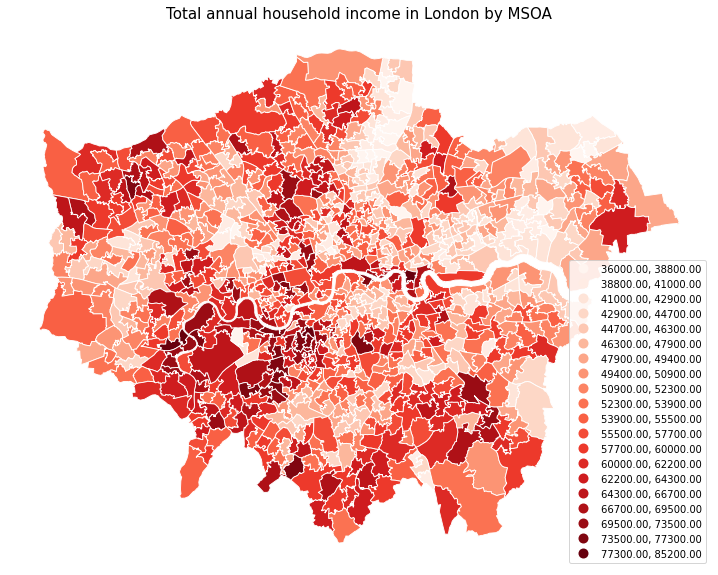

In [27]:
# Plot the map
fig, ax = plt.subplots(1, figsize=(20, 10))
ax.axis('off')
ax.set_title('Total annual household income in London by MSOA', fontdict={'fontsize': '15', 'fontweight' : '3'})

income_map.plot(column='Total annual income (£)',
                cmap='Reds',
                linewidth=0.9,
                ax=ax,
                edgecolor='1',
                scheme='NaturalBreaks', 
                k=20,
                legend=True,
                legend_kwds={'loc': 'lower right'})

# Work

## Workplace data

In [28]:
# Read data
workplace = pd.read_excel('data/work_place.xls', 
                           sheet_name='number of workplaces', # the sheet that the data is in
                           header=[2])

In [29]:
workplace

,Local Authority Code,MSOA code,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,E09000001,E02000001,15720.0,15965.0,16535.0,17365.0,18980.0,20415.0,26835.0,26270.0,26355.0,26500.0
1,E09000002,E02000002,95.0,115.0,130.0,135.0,170.0,190.0,205.0,220.0,225.0,240.0
2,E09000002,E02000003,320.0,355.0,355.0,390.0,435.0,500.0,515.0,505.0,530.0,570.0
3,E09000002,E02000004,105.0,110.0,110.0,120.0,150.0,155.0,170.0,170.0,160.0,170.0
4,E09000002,E02000005,125.0,150.0,140.0,160.0,185.0,200.0,265.0,280.0,300.0,320.0
...,...,...,...,...,...,...,...,...,...,...,...,...
994,www.ons.gov.uk/methodology/geography/ukgeograp...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,"5. In 2015, the IDBR extended the coverage of ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,previously excluded because of a risk of dupli...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,note explaining these changes can be found on ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# select multile columns
workplace = workplace[["Local Authority Code","MSOA code","2020"]]

In [31]:
workplace

,Local Authority Code,MSOA code,2020
0,E09000001,E02000001,26500.0
1,E09000002,E02000002,240.0
2,E09000002,E02000003,570.0
3,E09000002,E02000004,170.0
4,E09000002,E02000005,320.0
...,...,...,...
994,www.ons.gov.uk/methodology/geography/ukgeograp...,NaN,NaN
995,"5. In 2015, the IDBR extended the coverage of ...",NaN,NaN
996,previously excluded because of a risk of dupli...,NaN,NaN
997,note explaining these changes can be found on ...,NaN,NaN


## London MSOA data

In [32]:
# Read London MSOA Geodata
london_areas = gpd.read_file('data/statistical-gis-boundaries-london/ESRI/MSOA_2011_London_gen_MHW.shp')
london_areas.head()

,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ,geometry
0,E02000001,City of London 001,E09000001,City of London,E12000007,London,7375,7187,188,25.5,4385,1.6,"MULTIPOLYGON (((531667.624 180534.992, 531647...."
1,E02000002,Barking and Dagenham 001,E09000002,Barking and Dagenham,E12000007,London,6775,6724,51,31.3,2713,2.5,"POLYGON ((548881.563 190845.265, 548881.125 19..."
2,E02000003,Barking and Dagenham 002,E09000002,Barking and Dagenham,E12000007,London,10045,10033,12,46.9,3834,2.6,"POLYGON ((549102.438 189324.625, 548954.500 18..."
3,E02000004,Barking and Dagenham 003,E09000002,Barking and Dagenham,E12000007,London,6182,5937,245,24.8,2318,2.6,"POLYGON ((551549.998 187364.637, 551478.000 18..."
4,E02000005,Barking and Dagenham 004,E09000002,Barking and Dagenham,E12000007,London,8562,8562,0,72.1,3183,2.7,"POLYGON ((549099.634 187656.076, 549161.375 18..."


In [33]:
# merger with msoa data
workplace_map = london_areas.merge(workplace, 
                                   left_on='MSOA11CD', 
                                   right_on='MSOA code', 
                                   how='left')
workplace_map = workplace_map.rename(columns={"2020":"workplace"})

In [34]:
workplace_map

,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ,geometry,Local Authority Code,MSOA code,workplace
0,E02000001,City of London 001,E09000001,City of London,E12000007,London,7375,7187,188,25.5,4385,1.6,"MULTIPOLYGON (((531667.624 180534.992, 531647....",E09000001,E02000001,26500.0
1,E02000002,Barking and Dagenham 001,E09000002,Barking and Dagenham,E12000007,London,6775,6724,51,31.3,2713,2.5,"POLYGON ((548881.563 190845.265, 548881.125 19...",E09000002,E02000002,240.0
2,E02000003,Barking and Dagenham 002,E09000002,Barking and Dagenham,E12000007,London,10045,10033,12,46.9,3834,2.6,"POLYGON ((549102.438 189324.625, 548954.500 18...",E09000002,E02000003,570.0
3,E02000004,Barking and Dagenham 003,E09000002,Barking and Dagenham,E12000007,London,6182,5937,245,24.8,2318,2.6,"POLYGON ((551549.998 187364.637, 551478.000 18...",E09000002,E02000004,170.0
4,E02000005,Barking and Dagenham 004,E09000002,Barking and Dagenham,E12000007,London,8562,8562,0,72.1,3183,2.7,"POLYGON ((549099.634 187656.076, 549161.375 18...",E09000002,E02000005,320.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,E02006927,Greenwich 034,E09000011,Greenwich,E12000007,London,8315,8241,74,33.0,3338,2.5,"POLYGON ((541029.881 176265.023, 541101.997 17...",E09000011,E02006927,430.0
979,E02006928,Greenwich 035,E09000011,Greenwich,E12000007,London,7341,6410,931,136.0,2977,2.2,"MULTIPOLYGON (((538300.370 177956.632, 538290....",E09000011,E02006928,650.0
980,E02006929,Greenwich 036,E09000011,Greenwich,E12000007,London,7490,7489,1,29.4,3333,2.2,"POLYGON ((540054.366 179353.136, 540220.352 17...",E09000011,E02006929,955.0
981,E02006930,Greenwich 037,E09000011,Greenwich,E12000007,London,6561,6557,4,75.6,2876,2.3,"POLYGON ((539552.478 178604.042, 539533.000 17...",E09000011,E02006930,575.0


In [35]:
workplace_map.to_csv("final_data/workplace_final.csv")

### Plot

<AxesSubplot:title={'center':'Number of workplaces in London by MSOA'}>

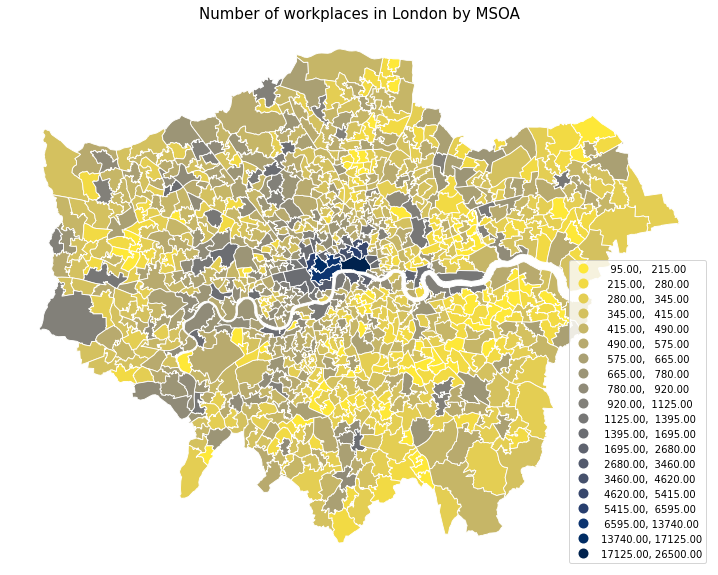

In [36]:
# Plot the map
fig, ax = plt.subplots(1, figsize=(20, 10))
ax.axis('off')
ax.set_title('Number of workplaces in London by MSOA', fontdict={'fontsize': '15', 'fontweight' : '3'})

workplace_map.plot(column='workplace',
                   cmap='cividis_r',
                   linewidth=0.9,
                   ax=ax,
                   edgecolor='1',
                   scheme='NaturalBreaks', 
                   k=20,
                   legend=True,
                   legend_kwds={'loc': 'lower right'})

## Employment data

In [37]:
# Read data
employee = pd.read_excel('data/work_place.xls', 
                         sheet_name='number of employees', # the sheet that the data is in
                         header=[2])

In [38]:
employee

,Local Authority Code,MSOA code,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,E09000001,E02000001,328000.0,354000,362000.0,370000.0,391000.0,423000.0,454000.0,474000.0,502000.0,517000.0
1,E09000002,E02000002,500.0,600,600.0,800.0,900.0,1000.0,900.0,1000.0,1000.0,1000.0
2,E09000002,E02000003,3500.0,3500,3500.0,3000.0,3500.0,4000.0,4000.0,3500.0,3500.0,3500.0
3,E09000002,E02000004,1250.0,1000,1000.0,1000.0,1000.0,1250.0,1250.0,1250.0,1250.0,1250.0
4,E09000002,E02000005,900.0,1000,900.0,900.0,1250.0,900.0,1000.0,1250.0,1000.0,1250.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1010,"5,000 +",1000,NaN,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1012,These rounding rules are based on rules applie...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1013,Further details can be found here:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# select multile columns
employee = employee[["Local Authority Code","MSOA code","2020"]]

## London MSOA data

In [40]:
# Read London MSOA Geodata
london_areas = gpd.read_file('data/statistical-gis-boundaries-london/ESRI/MSOA_2011_London_gen_MHW.shp')
london_areas.head()

,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ,geometry
0,E02000001,City of London 001,E09000001,City of London,E12000007,London,7375,7187,188,25.5,4385,1.6,"MULTIPOLYGON (((531667.624 180534.992, 531647...."
1,E02000002,Barking and Dagenham 001,E09000002,Barking and Dagenham,E12000007,London,6775,6724,51,31.3,2713,2.5,"POLYGON ((548881.563 190845.265, 548881.125 19..."
2,E02000003,Barking and Dagenham 002,E09000002,Barking and Dagenham,E12000007,London,10045,10033,12,46.9,3834,2.6,"POLYGON ((549102.438 189324.625, 548954.500 18..."
3,E02000004,Barking and Dagenham 003,E09000002,Barking and Dagenham,E12000007,London,6182,5937,245,24.8,2318,2.6,"POLYGON ((551549.998 187364.637, 551478.000 18..."
4,E02000005,Barking and Dagenham 004,E09000002,Barking and Dagenham,E12000007,London,8562,8562,0,72.1,3183,2.7,"POLYGON ((549099.634 187656.076, 549161.375 18..."


In [41]:
# merger with msoa data
employee_map = london_areas.merge(employee, 
                                  left_on='MSOA11CD', 
                                  right_on='MSOA code', 
                                  how='left')
employee_map = employee_map.rename(columns={"2020":"employee"})

In [42]:
employee_map

,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ,geometry,Local Authority Code,MSOA code,employee
0,E02000001,City of London 001,E09000001,City of London,E12000007,London,7375,7187,188,25.5,4385,1.6,"MULTIPOLYGON (((531667.624 180534.992, 531647....",E09000001,E02000001,517000.0
1,E02000002,Barking and Dagenham 001,E09000002,Barking and Dagenham,E12000007,London,6775,6724,51,31.3,2713,2.5,"POLYGON ((548881.563 190845.265, 548881.125 19...",E09000002,E02000002,1000.0
2,E02000003,Barking and Dagenham 002,E09000002,Barking and Dagenham,E12000007,London,10045,10033,12,46.9,3834,2.6,"POLYGON ((549102.438 189324.625, 548954.500 18...",E09000002,E02000003,3500.0
3,E02000004,Barking and Dagenham 003,E09000002,Barking and Dagenham,E12000007,London,6182,5937,245,24.8,2318,2.6,"POLYGON ((551549.998 187364.637, 551478.000 18...",E09000002,E02000004,1250.0
4,E02000005,Barking and Dagenham 004,E09000002,Barking and Dagenham,E12000007,London,8562,8562,0,72.1,3183,2.7,"POLYGON ((549099.634 187656.076, 549161.375 18...",E09000002,E02000005,1250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,E02006927,Greenwich 034,E09000011,Greenwich,E12000007,London,8315,8241,74,33.0,3338,2.5,"POLYGON ((541029.881 176265.023, 541101.997 17...",E09000011,E02006927,2500.0
979,E02006928,Greenwich 035,E09000011,Greenwich,E12000007,London,7341,6410,931,136.0,2977,2.2,"MULTIPOLYGON (((538300.370 177956.632, 538290....",E09000011,E02006928,4000.0
980,E02006929,Greenwich 036,E09000011,Greenwich,E12000007,London,7490,7489,1,29.4,3333,2.2,"POLYGON ((540054.366 179353.136, 540220.352 17...",E09000011,E02006929,13000.0
981,E02006930,Greenwich 037,E09000011,Greenwich,E12000007,London,6561,6557,4,75.6,2876,2.3,"POLYGON ((539552.478 178604.042, 539533.000 17...",E09000011,E02006930,3500.0


In [43]:
employee_map.to_csv("final_data/employee_final.csv")

### PLot

<AxesSubplot:title={'center':'Number of employees in London by MSOA'}>

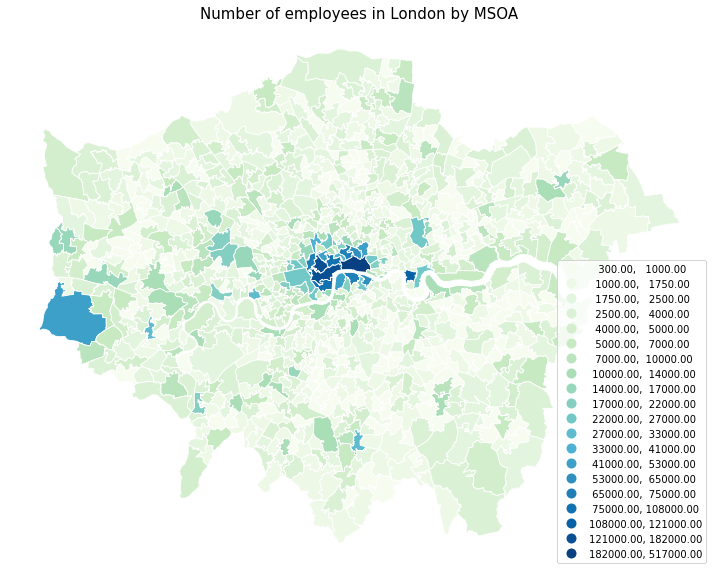

In [44]:
# Plot the map
fig, ax = plt.subplots(1, figsize=(20, 10))
ax.axis('off')
ax.set_title('Number of employees in London by MSOA', fontdict={'fontsize': '15', 'fontweight' : '3'})

employee_map.plot(column='employee',
                  cmap='GnBu',
                  linewidth=0.9,
                  ax=ax,
                  edgecolor='1',
                  scheme='NaturalBreaks', 
                  k=20,
                  legend=True,
                  legend_kwds={'loc': 'lower right'})

# Transport

## Transport accessibility data

In [45]:
# Read data
transport = pd.read_csv('data/DiB2/Data_reduced/GB_MSOA_PTAI_2016.csv')

In [46]:
transport

,msoa11cd,PTAI
0,E02000001,4.858553
1,E02000002,0.290854
2,E02000003,6.985213
3,E02000004,4.859534
4,E02000005,1.901569
...,...,...
8475,S02002510,3.436309
8476,S02002511,8.459254
8477,S02002512,7.748050
8478,S02002513,7.772523


## London MSOA data

In [47]:
# Read London MSOA Geodata
london_areas = gpd.read_file('data/statistical-gis-boundaries-london/ESRI/MSOA_2011_London_gen_MHW.shp')
london_areas.head()

,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ,geometry
0,E02000001,City of London 001,E09000001,City of London,E12000007,London,7375,7187,188,25.5,4385,1.6,"MULTIPOLYGON (((531667.624 180534.992, 531647...."
1,E02000002,Barking and Dagenham 001,E09000002,Barking and Dagenham,E12000007,London,6775,6724,51,31.3,2713,2.5,"POLYGON ((548881.563 190845.265, 548881.125 19..."
2,E02000003,Barking and Dagenham 002,E09000002,Barking and Dagenham,E12000007,London,10045,10033,12,46.9,3834,2.6,"POLYGON ((549102.438 189324.625, 548954.500 18..."
3,E02000004,Barking and Dagenham 003,E09000002,Barking and Dagenham,E12000007,London,6182,5937,245,24.8,2318,2.6,"POLYGON ((551549.998 187364.637, 551478.000 18..."
4,E02000005,Barking and Dagenham 004,E09000002,Barking and Dagenham,E12000007,London,8562,8562,0,72.1,3183,2.7,"POLYGON ((549099.634 187656.076, 549161.375 18..."


In [48]:
# merger with msoa data
transport_map = london_areas.merge(transport, 
                                   left_on='MSOA11CD', 
                                   right_on='msoa11cd', 
                                   how='left')

In [49]:
transport_map

,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ,geometry,msoa11cd,PTAI
0,E02000001,City of London 001,E09000001,City of London,E12000007,London,7375,7187,188,25.5,4385,1.6,"MULTIPOLYGON (((531667.624 180534.992, 531647....",E02000001,4.858553
1,E02000002,Barking and Dagenham 001,E09000002,Barking and Dagenham,E12000007,London,6775,6724,51,31.3,2713,2.5,"POLYGON ((548881.563 190845.265, 548881.125 19...",E02000002,0.290854
2,E02000003,Barking and Dagenham 002,E09000002,Barking and Dagenham,E12000007,London,10045,10033,12,46.9,3834,2.6,"POLYGON ((549102.438 189324.625, 548954.500 18...",E02000003,6.985213
3,E02000004,Barking and Dagenham 003,E09000002,Barking and Dagenham,E12000007,London,6182,5937,245,24.8,2318,2.6,"POLYGON ((551549.998 187364.637, 551478.000 18...",E02000004,4.859534
4,E02000005,Barking and Dagenham 004,E09000002,Barking and Dagenham,E12000007,London,8562,8562,0,72.1,3183,2.7,"POLYGON ((549099.634 187656.076, 549161.375 18...",E02000005,1.901569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,E02006927,Greenwich 034,E09000011,Greenwich,E12000007,London,8315,8241,74,33.0,3338,2.5,"POLYGON ((541029.881 176265.023, 541101.997 17...",E02006927,22.184893
979,E02006928,Greenwich 035,E09000011,Greenwich,E12000007,London,7341,6410,931,136.0,2977,2.2,"MULTIPOLYGON (((538300.370 177956.632, 538290....",E02006928,13.974806
980,E02006929,Greenwich 036,E09000011,Greenwich,E12000007,London,7490,7489,1,29.4,3333,2.2,"POLYGON ((540054.366 179353.136, 540220.352 17...",E02006929,6.577844
981,E02006930,Greenwich 037,E09000011,Greenwich,E12000007,London,6561,6557,4,75.6,2876,2.3,"POLYGON ((539552.478 178604.042, 539533.000 17...",E02006930,15.227443


In [50]:
transport_map.to_csv("final_data/transport_final.csv")

### Plot

<AxesSubplot:title={'center':'Public transport availability metrics in London by MSOA'}>

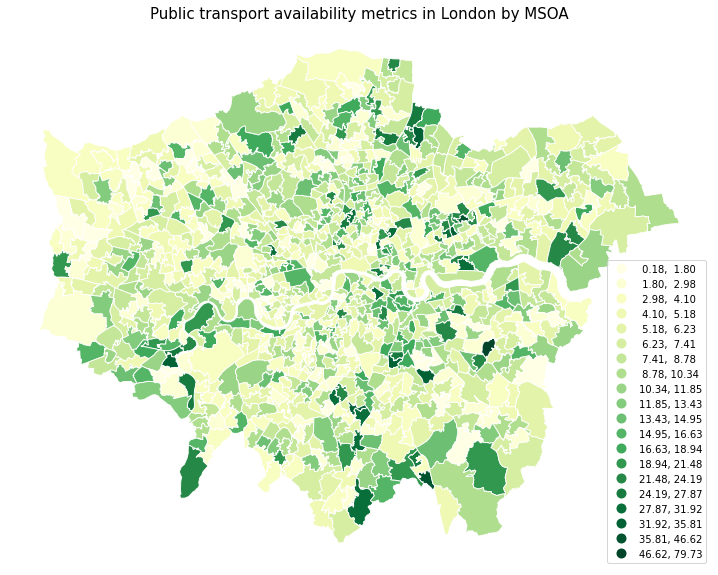

In [51]:
# Plot the map
fig, ax = plt.subplots(1, figsize=(20, 10))
ax.axis('off')
ax.set_title('Public transport availability metrics in London by MSOA', fontdict={'fontsize': '15', 'fontweight' : '3'})

transport_map.plot(column='PTAI',
                   cmap='YlGn',
                   linewidth=0.9,
                   ax=ax,
                   edgecolor='1',
                   scheme='NaturalBreaks', 
                   k=20,
                   legend=True,
                   legend_kwds={'loc': 'lower right'})

## Railway station data

In [52]:
from dataprep.clean import clean_lat_long

In [53]:
# Read data
rail_station1 = pd.read_excel('data/railway station.xlsx')

In [54]:
rail_station1

,Station,Local authority,Managed by,Station code,Fare zone,Year opened,Category,Coordinates
0,Abbey Wood,Greenwich,Elizabeth line,ABW,4,1849,C,51.4915°N 0.1229°E
1,Acton Central,Ealing,London Overground,ACC,3,1853,D,51.5088°N 0.2634°W
2,Acton Main Line[1],Ealing,Elizabeth line,AML,3,1868,E,51.5169°N 0.2669°W
3,Albany Park,Bexley,Southeastern,AYP,5,1935,D,51.4358°N 0.1266°E
4,Alexandra Palace[2],Haringey,Great Northern,AAP,3,1873,D,51.5983°N 0.1197°W
...,...,...,...,...,...,...,...,...
368,Woodmansterne,Croydon,Southern,WME,6,1904,E,51.3192°N 0.1539°W
369,Woolwich,Greenwich,Elizabeth line,WWC,2,2022,unlisted,51.491578°N 0.071819°E
370,Woolwich Arsenal,Greenwich,Southeastern,WWA,4,1849,C,51.4898°N 0.0694°E
371,Woolwich Dockyard[64],Greenwich,Southeastern,WWD,3,1849,E,51.4913°N 0.0536°E


In [55]:
rail_station = clean_lat_long(rail_station1, "Coordinates", split=True)

  0%|          | 0/10 [00:00<?, ?it/s]

Latitude and Longitude Cleaning Report:
	373 values cleaned (100.0%)
Result contains 373 (100.0%) values in the correct format and 0 null values (0.0%)


In [56]:
rail_station

,Station,Local authority,Managed by,Station code,Fare zone,Year opened,Category,Coordinates,latitude,longitude
0,Abbey Wood,Greenwich,Elizabeth line,ABW,4,1849,C,51.4915°N 0.1229°E,51.4915,0.1229
1,Acton Central,Ealing,London Overground,ACC,3,1853,D,51.5088°N 0.2634°W,51.5088,-0.2634
2,Acton Main Line[1],Ealing,Elizabeth line,AML,3,1868,E,51.5169°N 0.2669°W,51.5169,-0.2669
3,Albany Park,Bexley,Southeastern,AYP,5,1935,D,51.4358°N 0.1266°E,51.4358,0.1266
4,Alexandra Palace[2],Haringey,Great Northern,AAP,3,1873,D,51.5983°N 0.1197°W,51.5983,-0.1197
...,...,...,...,...,...,...,...,...,...,...
368,Woodmansterne,Croydon,Southern,WME,6,1904,E,51.3192°N 0.1539°W,51.3192,-0.1539
369,Woolwich,Greenwich,Elizabeth line,WWC,2,2022,unlisted,51.491578°N 0.071819°E,51.4916,0.0718
370,Woolwich Arsenal,Greenwich,Southeastern,WWA,4,1849,C,51.4898°N 0.0694°E,51.4898,0.0694
371,Woolwich Dockyard[64],Greenwich,Southeastern,WWD,3,1849,E,51.4913°N 0.0536°E,51.4913,0.0536


In [57]:
# Add Geometry and Reproject
gdf_railway = gpd.GeoDataFrame(rail_station, 
                               geometry=gpd.points_from_xy(rail_station['longitude'], rail_station['latitude'], crs='epsg:4326'))
gdf_railway = gdf_railway.to_crs('epsg:27700')

In [58]:
# Check crs
gdf_railway.crs

<Derived Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.0, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

## London MSOA data

In [59]:
# Read London MSOA Geodata
london_areas = gpd.read_file('data/statistical-gis-boundaries-london/ESRI/MSOA_2011_London_gen_MHW.shp')
london_areas.head()

Failed to auto identify EPSG: 7


,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ,geometry
0,E02000001,City of London 001,E09000001,City of London,E12000007,London,7375,7187,188,25.5,4385,1.6,"MULTIPOLYGON (((531667.624 180534.992, 531647...."
1,E02000002,Barking and Dagenham 001,E09000002,Barking and Dagenham,E12000007,London,6775,6724,51,31.3,2713,2.5,"POLYGON ((548881.563 190845.265, 548881.125 19..."
2,E02000003,Barking and Dagenham 002,E09000002,Barking and Dagenham,E12000007,London,10045,10033,12,46.9,3834,2.6,"POLYGON ((549102.438 189324.625, 548954.500 18..."
3,E02000004,Barking and Dagenham 003,E09000002,Barking and Dagenham,E12000007,London,6182,5937,245,24.8,2318,2.6,"POLYGON ((551549.998 187364.637, 551478.000 18..."
4,E02000005,Barking and Dagenham 004,E09000002,Barking and Dagenham,E12000007,London,8562,8562,0,72.1,3183,2.7,"POLYGON ((549099.634 187656.076, 549161.375 18..."


In [60]:
# Make sure they're using the same projection reference
gdf_railway.crs = london_areas.crs

In [61]:
# Spatial join
sjoined_railway = gpd.sjoin(gdf_railway, london_areas, how="left", predicate="within")

In [62]:
sjoined_railway

,Station,Local authority,Managed by,Station code,Fare zone,Year opened,Category,Coordinates,latitude,longitude,...,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ
0,Abbey Wood,Greenwich,Elizabeth line,ABW,4,1849,C,51.4915°N 0.1229°E,51.4915,0.1229,...,E09000004,Bexley,E12000007,London,9641.0,9599.0,42.0,61.3,3795.0,2.5
1,Acton Central,Ealing,London Overground,ACC,3,1853,D,51.5088°N 0.2634°W,51.5088,-0.2634,...,E09000009,Ealing,E12000007,London,8925.0,8755.0,170.0,126.2,3771.0,2.3
2,Acton Main Line[1],Ealing,Elizabeth line,AML,3,1868,E,51.5169°N 0.2669°W,51.5169,-0.2669,...,E09000009,Ealing,E12000007,London,9706.0,9647.0,59.0,30.4,3717.0,2.6
3,Albany Park,Bexley,Southeastern,AYP,5,1935,D,51.4358°N 0.1266°E,51.4358,0.1266,...,E09000004,Bexley,E12000007,London,7737.0,7737.0,0.0,38.7,2984.0,2.6
4,Alexandra Palace[2],Haringey,Great Northern,AAP,3,1873,D,51.5983°N 0.1197°W,51.5983,-0.1197,...,E09000014,Haringey,E12000007,London,7668.0,7648.0,20.0,57.5,3061.0,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,Woodmansterne,Croydon,Southern,WME,6,1904,E,51.3192°N 0.1539°W,51.3192,-0.1539,...,E09000008,Croydon,E12000007,London,7659.0,7631.0,28.0,21.4,2838.0,2.7
369,Woolwich,Greenwich,Elizabeth line,WWC,2,2022,unlisted,51.491578°N 0.071819°E,51.4916,0.0718,...,E09000011,Greenwich,E12000007,London,10750.0,10698.0,52.0,57.0,4944.0,2.2
370,Woolwich Arsenal,Greenwich,Southeastern,WWA,4,1849,C,51.4898°N 0.0694°E,51.4898,0.0694,...,E09000011,Greenwich,E12000007,London,10750.0,10698.0,52.0,57.0,4944.0,2.2
371,Woolwich Dockyard[64],Greenwich,Southeastern,WWD,3,1849,E,51.4913°N 0.0536°E,51.4913,0.0536,...,E09000011,Greenwich,E12000007,London,10750.0,10698.0,52.0,57.0,4944.0,2.2


In [63]:
# select multile columns
sjoined_railway = sjoined_railway[["Station","latitude","longitude",'MSOA11CD','MSOA11NM','LAD11CD','LAD11NM']]

In [64]:
sjoined_railway

,Station,latitude,longitude,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM
0,Abbey Wood,51.4915,0.1229,E02000066,Bexley 002,E09000004,Bexley
1,Acton Central,51.5088,-0.2634,E02000262,Ealing 025,E09000009,Ealing
2,Acton Main Line[1],51.5169,-0.2669,E02000252,Ealing 015,E09000009,Ealing
3,Albany Park,51.4358,0.1266,E02000088,Bexley 024,E09000004,Bexley
4,Alexandra Palace[2],51.5983,-0.1197,E02000400,Haringey 004,E09000014,Haringey
...,...,...,...,...,...,...,...
368,Woodmansterne,51.3192,-0.1539,E02000236,Croydon 043,E09000008,Croydon
369,Woolwich,51.4916,0.0718,E02000316,Greenwich 004,E09000011,Greenwich
370,Woolwich Arsenal,51.4898,0.0694,E02000316,Greenwich 004,E09000011,Greenwich
371,Woolwich Dockyard[64],51.4913,0.0536,E02000316,Greenwich 004,E09000011,Greenwich


### Calculate number of railway station on each msoa

In [65]:
num_rail1 = sjoined_railway.groupby(['MSOA11CD'])['Station'].agg(Count='count').reset_index()

In [66]:
num_rail1

,MSOA11CD,Count
0,E02000001,6
1,E02000017,1
2,E02000019,1
3,E02000028,1
4,E02000031,1
...,...,...
277,E02006918,1
278,E02006927,1
279,E02006928,1
280,E02006929,1


In [67]:
# merger with msoa data
num_rail = london_areas.merge(num_rail1, 
                              left_on='MSOA11CD', 
                              right_on='MSOA11CD', 
                              how='left')

In [68]:
num_rail

,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ,geometry,Count
0,E02000001,City of London 001,E09000001,City of London,E12000007,London,7375,7187,188,25.5,4385,1.6,"MULTIPOLYGON (((531667.624 180534.992, 531647....",6.0
1,E02000002,Barking and Dagenham 001,E09000002,Barking and Dagenham,E12000007,London,6775,6724,51,31.3,2713,2.5,"POLYGON ((548881.563 190845.265, 548881.125 19...",NaN
2,E02000003,Barking and Dagenham 002,E09000002,Barking and Dagenham,E12000007,London,10045,10033,12,46.9,3834,2.6,"POLYGON ((549102.438 189324.625, 548954.500 18...",NaN
3,E02000004,Barking and Dagenham 003,E09000002,Barking and Dagenham,E12000007,London,6182,5937,245,24.8,2318,2.6,"POLYGON ((551549.998 187364.637, 551478.000 18...",NaN
4,E02000005,Barking and Dagenham 004,E09000002,Barking and Dagenham,E12000007,London,8562,8562,0,72.1,3183,2.7,"POLYGON ((549099.634 187656.076, 549161.375 18...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,E02006927,Greenwich 034,E09000011,Greenwich,E12000007,London,8315,8241,74,33.0,3338,2.5,"POLYGON ((541029.881 176265.023, 541101.997 17...",1.0
979,E02006928,Greenwich 035,E09000011,Greenwich,E12000007,London,7341,6410,931,136.0,2977,2.2,"MULTIPOLYGON (((538300.370 177956.632, 538290....",1.0
980,E02006929,Greenwich 036,E09000011,Greenwich,E12000007,London,7490,7489,1,29.4,3333,2.2,"POLYGON ((540054.366 179353.136, 540220.352 17...",1.0
981,E02006930,Greenwich 037,E09000011,Greenwich,E12000007,London,6561,6557,4,75.6,2876,2.3,"POLYGON ((539552.478 178604.042, 539533.000 17...",1.0


In [69]:
# select multile columns
num_rail = num_rail[["MSOA11CD","Count"]] 
# convert na to 0
num_rail['Count'] = num_rail['Count'].fillna(0)

<ipython-input-69-4c48b41dc13f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_rail['Count'] = num_rail['Count'].fillna(0)


In [70]:
num_rail

,MSOA11CD,Count
0,E02000001,6.0
1,E02000002,0.0
2,E02000003,0.0
3,E02000004,0.0
4,E02000005,0.0
...,...,...
978,E02006927,1.0
979,E02006928,1.0
980,E02006929,1.0
981,E02006930,1.0


In [71]:
# merge data
rail_map = num_rail.merge(london_areas, 
                          left_on='MSOA11CD', 
                          right_on='MSOA11CD', 
                          how='left')
rail_map = gpd.GeoDataFrame(rail_map)

In [72]:
rail_map.to_csv("final_data/railway_final.csv")

In [73]:
import plotly.figure_factory as ff
import matplotlib.pyplot as plt

/opt/anaconda3/lib/python3.8/site-packages/mapclassify/classifiers.py:1718: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(ms, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/mapclassify/classifiers.py:1719: UserWarning: Warning: setting k to 5
  Warn("Warning: setting k to %d" % uvk, UserWarning)


<AxesSubplot:title={'center':'Number of railway stations in London by MSOA'}>

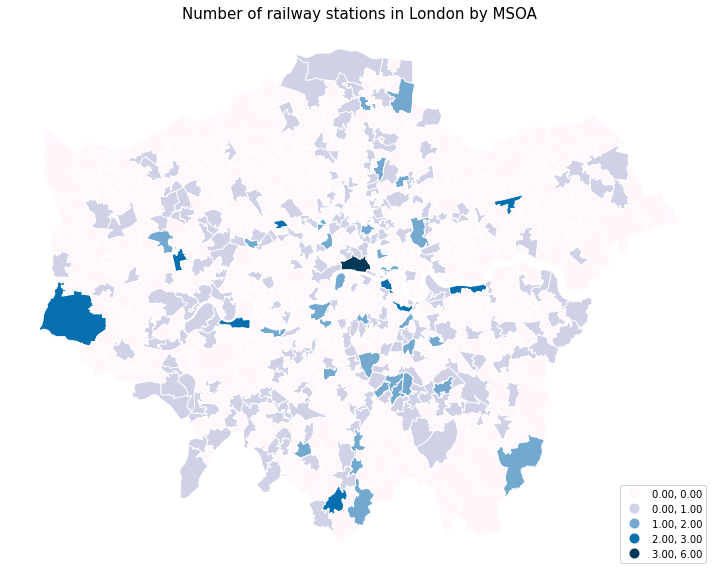

In [74]:
# Plot the map
fig, ax = plt.subplots(1, figsize=(20, 10))
ax.axis('off')
ax.set_title('Number of railway stations in London by MSOA', fontdict={'fontsize': '15', 'fontweight' : '3'})

rail_map.plot(column='Count',
              cmap='PuBu',
              linewidth=0.9,
              ax=ax,
              edgecolor='1',
              scheme='NaturalBreaks', 
              k=20,
              legend=True,
              legend_kwds={'loc': 'lower right'})

## Underground Station Data

In [75]:
# Read data
under_station = pd.read_excel('data/underground station.xlsx',
                              header=[1])

In [76]:
under_station

,Name,Latitude,Longitude,Platform / Entrance,Collected By,Collected On,Line,Step free
0,Acton Town,51.502500,-0.278126,Platform,User:Gagravarr,2006-11-24 00:00:00,"District, Piccadilly",NaN
1,Acton Central,51.508835,-0.263033,Entrance,User:Firefishy,2007-05-08 00:00:00,London Overground,NaN
2,Acton Central,51.508560,-0.262880,Platform,User:Firefishy,2007-05-08 00:00:00,London Overground,NaN
3,Aldgate,51.513940,-0.075370,Aldgate High Street entrance,User:Morwen,2007-04-28 00:00:00,Metropolitan,No
4,Aldgate East,51.515140,-0.071780,Entrance,User:Parsingphase,-2006,"District, Hammersmith & City",NaN
...,...,...,...,...,...,...,...,...
339,Stratford,51.540470,-0.005085,DLR Platform,User:Mattwestcott,2006-11-04 00:00:00,NaN,NaN
340,Tower Gateway,51.510911,-0.073466,Platform,User:Gagravarr,2006-10-10 00:00:00,NaN,NaN
341,Westferry,51.509576,-0.026990,Platform,User:Gagravarr,2006-10-10 00:00:00,NaN,NaN
342,West India Quay,51.506723,-0.019880,Platform,User:Gagravarr,2006-10-10 00:00:00,NaN,NaN


In [77]:
# Add Geometry and Reproject
gdf_underground = gpd.GeoDataFrame(under_station, 
                                   geometry=gpd.points_from_xy(under_station['Longitude'], under_station['Latitude'], crs='epsg:4326'))
gdf_underground = gdf_underground.to_crs('epsg:27700')

In [78]:
# Check crs
gdf_underground.crs

<Derived Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.0, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

## London MSOA data

In [79]:
# Read London MSOA Geodata
london_areas = gpd.read_file('data/statistical-gis-boundaries-london/ESRI/MSOA_2011_London_gen_MHW.shp')
london_areas.head()

Failed to auto identify EPSG: 7


,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ,geometry
0,E02000001,City of London 001,E09000001,City of London,E12000007,London,7375,7187,188,25.5,4385,1.6,"MULTIPOLYGON (((531667.624 180534.992, 531647...."
1,E02000002,Barking and Dagenham 001,E09000002,Barking and Dagenham,E12000007,London,6775,6724,51,31.3,2713,2.5,"POLYGON ((548881.563 190845.265, 548881.125 19..."
2,E02000003,Barking and Dagenham 002,E09000002,Barking and Dagenham,E12000007,London,10045,10033,12,46.9,3834,2.6,"POLYGON ((549102.438 189324.625, 548954.500 18..."
3,E02000004,Barking and Dagenham 003,E09000002,Barking and Dagenham,E12000007,London,6182,5937,245,24.8,2318,2.6,"POLYGON ((551549.998 187364.637, 551478.000 18..."
4,E02000005,Barking and Dagenham 004,E09000002,Barking and Dagenham,E12000007,London,8562,8562,0,72.1,3183,2.7,"POLYGON ((549099.634 187656.076, 549161.375 18..."


In [80]:
# Make sure they're using the same projection reference
gdf_underground.crs = london_areas.crs

In [81]:
# Spatial join
sjoined_underground = gpd.sjoin(gdf_underground, london_areas, how="left", predicate="within")

In [82]:
sjoined_underground

,Name,Latitude,Longitude,Platform / Entrance,Collected By,Collected On,Line,Step free,geometry,index_right,...,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ
0,Acton Town,51.502500,-0.278126,Platform,User:Gagravarr,2006-11-24 00:00:00,"District, Piccadilly",NaN,POINT (519609.561 179579.054),263.0,...,E09000009,Ealing,E12000007,London,8043.0,8040.0,3.0,101.0,3331.0,2.4
1,Acton Central,51.508835,-0.263033,Entrance,User:Firefishy,2007-05-08 00:00:00,London Overground,NaN,POINT (520640.343 180308.322),255.0,...,E09000009,Ealing,E12000007,London,8925.0,8755.0,170.0,126.2,3771.0,2.3
2,Acton Central,51.508560,-0.262880,Platform,User:Firefishy,2007-05-08 00:00:00,London Overground,NaN,POINT (520651.731 180277.974),254.0,...,E09000009,Ealing,E12000007,London,10766.0,10752.0,14.0,82.5,4110.0,2.6
3,Aldgate,51.513940,-0.075370,Aldgate High Street entrance,User:Morwen,2007-04-28 00:00:00,Metropolitan,No,POINT (533648.000 181201.736),0.0,...,E09000001,City of London,E12000007,London,7375.0,7187.0,188.0,25.5,4385.0,1.6
4,Aldgate East,51.515140,-0.071780,Entrance,User:Parsingphase,-2006,"District, Hammersmith & City",NaN,POINT (533893.575 181341.736),852.0,...,E09000030,Tower Hamlets,E12000007,London,9086.0,9021.0,65.0,166.6,3707.0,2.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,Stratford,51.540470,-0.005085,DLR Platform,User:Mattwestcott,2006-11-04 00:00:00,NaN,NaN,POINT (538444.248 184282.524),701.0,...,E09000025,Newham,E12000007,London,8892.0,8874.0,18.0,26.2,3666.0,2.4
340,Tower Gateway,51.510911,-0.073466,Platform,User:Gagravarr,2006-10-10 00:00:00,NaN,NaN,POINT (533788.976 180868.379),0.0,...,E09000001,City of London,E12000007,London,7375.0,7187.0,188.0,25.5,4385.0,1.6
341,Westferry,51.509576,-0.026990,Platform,User:Gagravarr,2006-10-10 00:00:00,NaN,NaN,POINT (537017.910 180805.845),854.0,...,E09000030,Tower Hamlets,E12000007,London,7326.0,7326.0,0.0,149.7,3185.0,2.3
342,West India Quay,51.506723,-0.019880,Platform,User:Gagravarr,2006-10-10 00:00:00,NaN,NaN,POINT (537519.864 180501.911),972.0,...,E09000030,Tower Hamlets,E12000007,London,5883.0,5883.0,0.0,64.4,2991.0,2.0


In [83]:
# select multile columns
sjoined_underground = sjoined_underground[["Name","Latitude","Longitude",'MSOA11CD','MSOA11NM','LAD11CD','LAD11NM']]

In [84]:
sjoined_underground

,Name,Latitude,Longitude,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM
0,Acton Town,51.502500,-0.278126,E02000270,Ealing 033,E09000009,Ealing
1,Acton Central,51.508835,-0.263033,E02000262,Ealing 025,E09000009,Ealing
2,Acton Central,51.508560,-0.262880,E02000261,Ealing 024,E09000009,Ealing
3,Aldgate,51.513940,-0.075370,E02000001,City of London 001,E09000001,City of London
4,Aldgate East,51.515140,-0.071780,E02000884,Tower Hamlets 021,E09000030,Tower Hamlets
...,...,...,...,...,...,...,...
339,Stratford,51.540470,-0.005085,E02000726,Newham 013,E09000025,Newham
340,Tower Gateway,51.510911,-0.073466,E02000001,City of London 001,E09000001,City of London
341,Westferry,51.509576,-0.026990,E02000886,Tower Hamlets 023,E09000030,Tower Hamlets
342,West India Quay,51.506723,-0.019880,E02006854,Tower Hamlets 033,E09000030,Tower Hamlets


### Calculate number of underground station on each msoa

In [85]:
num_under1 = sjoined_underground.groupby(['MSOA11CD'])['Name'].agg(Count='count').reset_index()

In [86]:
num_under1

,MSOA11CD,Count
0,E02000001,12
1,E02000011,1
2,E02000012,1
3,E02000013,1
4,E02000014,1
...,...,...
220,E02006854,5
221,E02006924,1
222,E02006925,1
223,E02006928,2


In [87]:
# merger with msoa data
num_under = london_areas.merge(num_under1, 
                               left_on='MSOA11CD', 
                               right_on='MSOA11CD', 
                               how='left')

In [88]:
num_under

,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ,geometry,Count
0,E02000001,City of London 001,E09000001,City of London,E12000007,London,7375,7187,188,25.5,4385,1.6,"MULTIPOLYGON (((531667.624 180534.992, 531647....",12.0
1,E02000002,Barking and Dagenham 001,E09000002,Barking and Dagenham,E12000007,London,6775,6724,51,31.3,2713,2.5,"POLYGON ((548881.563 190845.265, 548881.125 19...",NaN
2,E02000003,Barking and Dagenham 002,E09000002,Barking and Dagenham,E12000007,London,10045,10033,12,46.9,3834,2.6,"POLYGON ((549102.438 189324.625, 548954.500 18...",NaN
3,E02000004,Barking and Dagenham 003,E09000002,Barking and Dagenham,E12000007,London,6182,5937,245,24.8,2318,2.6,"POLYGON ((551549.998 187364.637, 551478.000 18...",NaN
4,E02000005,Barking and Dagenham 004,E09000002,Barking and Dagenham,E12000007,London,8562,8562,0,72.1,3183,2.7,"POLYGON ((549099.634 187656.076, 549161.375 18...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,E02006927,Greenwich 034,E09000011,Greenwich,E12000007,London,8315,8241,74,33.0,3338,2.5,"POLYGON ((541029.881 176265.023, 541101.997 17...",NaN
979,E02006928,Greenwich 035,E09000011,Greenwich,E12000007,London,7341,6410,931,136.0,2977,2.2,"MULTIPOLYGON (((538300.370 177956.632, 538290....",2.0
980,E02006929,Greenwich 036,E09000011,Greenwich,E12000007,London,7490,7489,1,29.4,3333,2.2,"POLYGON ((540054.366 179353.136, 540220.352 17...",1.0
981,E02006930,Greenwich 037,E09000011,Greenwich,E12000007,London,6561,6557,4,75.6,2876,2.3,"POLYGON ((539552.478 178604.042, 539533.000 17...",NaN


In [89]:
# select multile columns
num_under = num_under[["MSOA11CD","Count"]] 
# convert na to 0
num_under['Count'] = num_under['Count'].fillna(0)

In [90]:
num_under

,MSOA11CD,Count
0,E02000001,12.0
1,E02000002,0.0
2,E02000003,0.0
3,E02000004,0.0
4,E02000005,0.0
...,...,...
978,E02006927,0.0
979,E02006928,2.0
980,E02006929,1.0
981,E02006930,0.0


In [91]:
# merge data
under_map = num_under.merge(london_areas, 
                           left_on='MSOA11CD', 
                           right_on='MSOA11CD', 
                           how='left')
under_map = gpd.GeoDataFrame(rail_map)

In [92]:
under_map.to_csv("final_data/underground_final.csv")

/opt/anaconda3/lib/python3.8/site-packages/mapclassify/classifiers.py:1718: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(ms, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/mapclassify/classifiers.py:1719: UserWarning: Warning: setting k to 5
  Warn("Warning: setting k to %d" % uvk, UserWarning)


<AxesSubplot:title={'center':'Number of underground stations in London by MSOA'}>

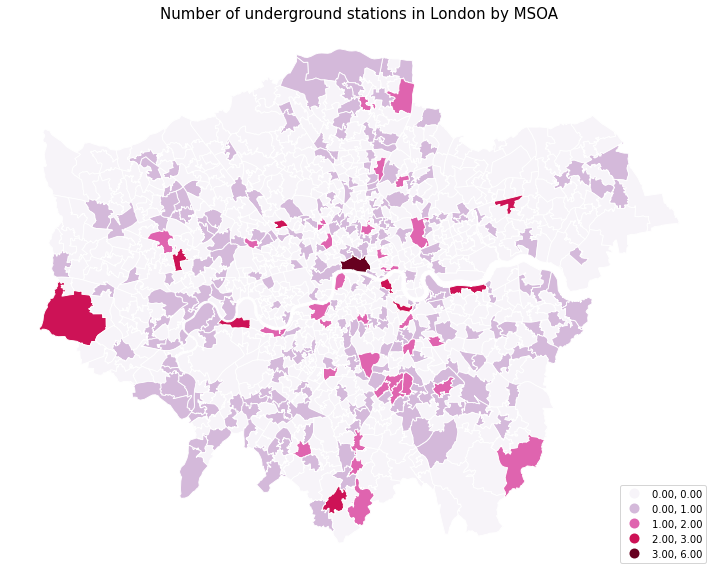

In [93]:
# Plot the map
fig, ax = plt.subplots(1, figsize=(20, 10))
ax.axis('off')
ax.set_title('Number of underground stations in London by MSOA', fontdict={'fontsize': '15', 'fontweight' : '3'})

under_map.plot(column='Count',
               cmap='PuRd',
               linewidth=0.9,
               ax=ax,
               edgecolor='1',
               scheme='NaturalBreaks', 
               k=20,
               legend=True,
               legend_kwds={'loc': 'lower right'})

## Supermarket data

In [41]:
# Read data
supermarket = pd.read_csv('data/GEOLYTIX - UK RetailPoints/geolytix_retailpoints_v23_202203.csv')

In [42]:
supermarket

,id,retailer,fascia,store_name,add_one,add_two,town,suburb,postcode,long_wgs,lat_wgs,bng_e,bng_n,pqi,open_date,size_band,county
0,1010000001,Aldi,Aldi,Aldi Aberdeen,Unit 9-10 Boulevard Retail Park,NaN,Aberdeen,Central Aberdeen,AB11 5EJ,-2.081728,57.148626,395153.8090,806418.6607,Rooftop geocoded by Geolytix,NaN,"3,013 < 15,069 ft2 (280 < 1,400 m2)",Aberdeenshire
1,1010000002,Aldi,Aldi,Aldi Westhill,Westhill Drive,NaN,Westhill,Westhill,AB32 6FY,-2.278341,57.154810,383260.1390,807138.5406,Rooftop geocoded by Geolytix,NaN,"3,013 < 15,069 ft2 (280 < 1,400 m2)",Aberdeenshire
2,1010000003,Aldi,Aldi,Aldi Ellon,Ythan Terrace,NaN,Ellon,NaN,AB41 9LJ,-2.075008,57.363314,395586.8090,830317.9907,Rooftop geocoded by Geolytix,NaN,"3,013 < 15,069 ft2 (280 < 1,400 m2)",Aberdeenshire
3,1010000004,Aldi,Aldi,Aldi Inverurie,Loco Works Road,NaN,Inverurie,NaN,AB51 4FY,-2.380156,57.288771,377183.9078,822081.1265,Rooftop geocoded by Geolytix,NaN,"3,013 < 15,069 ft2 (280 < 1,400 m2)",Aberdeenshire
4,1010000005,Aldi,Aldi,Aldi Hatfield,11 Parkhouse Court,Comet Way,"Hatfield, Hertfordshire",Hatfield Business Park,AL10 9RQ,-0.240950,51.763152,521491.8497,208626.7192,Rooftop geocoded by Geolytix,NaN,"3,013 < 15,069 ft2 (280 < 1,400 m2)",Hertfordshire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17216,1010019562,The Co-operative Group,The Co-operative Food,Co-op Killin - Lyon Road,Lyon Road,NaN,Killin,NaN,FK21 8UJ,-4.315851,56.469056,257429.2065,733173.7835,Rooftop geocoded by Geolytix,NaN,"3,013 < 15,069 ft2 (280 < 1,400 m2)",Stirlingshire
17217,1010019563,The Co-operative Group,The Co-operative Food,Co-op Cottam - Merry Trees Lane,Merry Trees Lane,NaN,Preston,Cottam,PR4 0NP,-2.760899,53.783587,349961.5688,432186.7715,Rooftop geocoded by Geolytix,NaN,"3,013 < 15,069 ft2 (280 < 1,400 m2)",Lancashire
17218,1010019564,The Co-operative Group,The Co-operative Food,Co-op Aberdeen - Mounthooly Way,2 Mounthooly Way,NaN,Aberdeen,Central Aberdeen,AB24 3ER,-2.098840,57.155718,394119.5391,807209.6002,Rooftop geocoded by Geolytix,NaN,"3,013 < 15,069 ft2 (280 < 1,400 m2)",Aberdeenshire
17219,1010019565,Central England Co-operative,The Co-operative Food,Co-op Ashby-De-La-Zouch,Market Street,NaN,Ashby-de-la-Zouch,NaN,LE65 1AL,-1.472857,52.746526,435681.6703,316675.1222,Rooftop geocoded by Geolytix,NaN,"3,013 < 15,069 ft2 (280 < 1,400 m2)",Leicestershire


In [43]:
# Add Geometry and Reproject
gdf_supermarket = gpd.GeoDataFrame(supermarket, 
                 geometry=gpd.points_from_xy(supermarket['long_wgs'], supermarket['lat_wgs'], crs='epsg:4326'))
gdf_supermarket = gdf_supermarket.to_crs('epsg:27700')

In [44]:
# Check crs
gdf_supermarket.crs

<Derived Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.0, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

## London MSOA Geodata

In [45]:
# Read London MSOA Geodata
london_areas = gpd.read_file('data/statistical-gis-boundaries-london/ESRI/MSOA_2011_London_gen_MHW.shp')
london_areas.head()

,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ,geometry
0,E02000001,City of London 001,E09000001,City of London,E12000007,London,7375,7187,188,25.5,4385,1.6,"MULTIPOLYGON (((531667.624 180534.992, 531647...."
1,E02000002,Barking and Dagenham 001,E09000002,Barking and Dagenham,E12000007,London,6775,6724,51,31.3,2713,2.5,"POLYGON ((548881.563 190845.265, 548881.125 19..."
2,E02000003,Barking and Dagenham 002,E09000002,Barking and Dagenham,E12000007,London,10045,10033,12,46.9,3834,2.6,"POLYGON ((549102.438 189324.625, 548954.500 18..."
3,E02000004,Barking and Dagenham 003,E09000002,Barking and Dagenham,E12000007,London,6182,5937,245,24.8,2318,2.6,"POLYGON ((551549.998 187364.637, 551478.000 18..."
4,E02000005,Barking and Dagenham 004,E09000002,Barking and Dagenham,E12000007,London,8562,8562,0,72.1,3183,2.7,"POLYGON ((549099.634 187656.076, 549161.375 18..."


In [46]:
# Transform crs
london_areas = london_areas.to_crs('EPSG:27700')

In [47]:
# Check crs
london_areas.crs

<Derived Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.0, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [48]:
# Make sure they're using the same projection reference
gdf_supermarket.crs = london_areas.crs

In [49]:
# Spatial join
sjoined_supermarket = gpd.sjoin(gdf_supermarket, london_areas, how="left", predicate="within")

In [50]:
# Drop NA
sjoined_supermarket.dropna(subset=['MSOA11CD'], inplace=True)
sjoined_supermarket.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1876 entries, 94 to 17201
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   id           1876 non-null   int64   
 1   retailer     1876 non-null   object  
 2   fascia       1876 non-null   object  
 3   store_name   1876 non-null   object  
 4   add_one      1875 non-null   object  
 5   add_two      776 non-null    object  
 6   town         1876 non-null   object  
 7   suburb       1866 non-null   object  
 8   postcode     1876 non-null   object  
 9   long_wgs     1876 non-null   float64 
 10  lat_wgs      1876 non-null   float64 
 11  bng_e        1876 non-null   float64 
 12  bng_n        1876 non-null   float64 
 13  pqi          1876 non-null   object  
 14  open_date    266 non-null    float64 
 15  size_band    1876 non-null   object  
 16  county       1876 non-null   object  
 17  geometry     1876 non-null   geometry
 18  index_right  1876 

In [51]:
# Select column
supermarket_final = sjoined_supermarket[['id', 'long_wgs','lat_wgs','MSOA11CD','MSOA11NM','LAD11CD','LAD11NM']]

### Calculate number of restaurants on each msoa

In [52]:
num_market = supermarket_final.groupby('MSOA11CD').size() 
df = num_market.to_frame().reset_index() 
df.columns = ['MSOA11CD', 'supermarket_count']

In [53]:
num_market1 = supermarket_final.groupby(['MSOA11CD'])['id'].agg(Count='count').reset_index()

In [55]:
num_market1

,MSOA11CD,Count
0,E02000001,35
1,E02000002,1
2,E02000003,2
3,E02000004,1
4,E02000005,3
...,...,...
750,E02006927,3
751,E02006928,5
752,E02006929,9
753,E02006930,6


In [56]:
# merger with msoa data
num_market = london_areas.merge(num_market1, 
                                left_on='MSOA11CD', 
                                right_on='MSOA11CD', 
                                how='left')

In [57]:
num_market

,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ,geometry,Count
0,E02000001,City of London 001,E09000001,City of London,E12000007,London,7375,7187,188,25.5,4385,1.6,"MULTIPOLYGON (((531667.624 180534.992, 531647....",35.0
1,E02000002,Barking and Dagenham 001,E09000002,Barking and Dagenham,E12000007,London,6775,6724,51,31.3,2713,2.5,"POLYGON ((548881.563 190845.265, 548881.125 19...",1.0
2,E02000003,Barking and Dagenham 002,E09000002,Barking and Dagenham,E12000007,London,10045,10033,12,46.9,3834,2.6,"POLYGON ((549102.438 189324.625, 548954.500 18...",2.0
3,E02000004,Barking and Dagenham 003,E09000002,Barking and Dagenham,E12000007,London,6182,5937,245,24.8,2318,2.6,"POLYGON ((551549.998 187364.637, 551478.000 18...",1.0
4,E02000005,Barking and Dagenham 004,E09000002,Barking and Dagenham,E12000007,London,8562,8562,0,72.1,3183,2.7,"POLYGON ((549099.634 187656.076, 549161.375 18...",3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,E02006927,Greenwich 034,E09000011,Greenwich,E12000007,London,8315,8241,74,33.0,3338,2.5,"POLYGON ((541029.881 176265.023, 541101.997 17...",3.0
979,E02006928,Greenwich 035,E09000011,Greenwich,E12000007,London,7341,6410,931,136.0,2977,2.2,"MULTIPOLYGON (((538300.370 177956.632, 538290....",5.0
980,E02006929,Greenwich 036,E09000011,Greenwich,E12000007,London,7490,7489,1,29.4,3333,2.2,"POLYGON ((540054.366 179353.136, 540220.352 17...",9.0
981,E02006930,Greenwich 037,E09000011,Greenwich,E12000007,London,6561,6557,4,75.6,2876,2.3,"POLYGON ((539552.478 178604.042, 539533.000 17...",6.0


In [58]:
# select multile columns
num_market = num_market[["MSOA11CD","Count"]] 
# convert na to 0
#num_rest['Count'] = num_rest['Count'].fillna(0)

In [60]:
num_market

,MSOA11CD,Count
0,E02000001,35.0
1,E02000002,1.0
2,E02000003,2.0
3,E02000004,1.0
4,E02000005,3.0
...,...,...
978,E02006927,3.0
979,E02006928,5.0
980,E02006929,9.0
981,E02006930,6.0


In [59]:
num_market.to_csv("final_data/supermarket_final.csv")
gpd.read_file('final_data/bus.geojson')

## Bus Stop

In [122]:
# Read data
bus_stop = gpd.read_file('final_data/bus.csv')
#bus_stop = bus_stop.set_crs('epsg:27700')

In [123]:
bus_stop.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 18648 entries, 0 to 18647
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Stop_Code_LBSL    18648 non-null  object  
 1   Bus_Stop_Code     18648 non-null  object  
 2   Naptan_Atco       18648 non-null  object  
 3   Stop_Name         18648 non-null  object  
 4   Heading           18648 non-null  object  
 5   Stop_Area         18648 non-null  object  
 6   Virtual_Bus_Stop  18648 non-null  object  
 7   longitude         18648 non-null  object  
 8   latitude          18648 non-null  object  
 9   geometry          0 non-null      geometry
dtypes: geometry(1), object(9)
memory usage: 1.4+ MB


In [124]:
bus_stop

,Stop_Code_LBSL,Bus_Stop_Code,Naptan_Atco,Stop_Name,Heading,Stop_Area,Virtual_Bus_Stop,longitude,latitude,geometry
0,1000,91532,490000266G,WESTMINSTER STATION <> / PARLIAMENT SQUARE,177,0K08,0,c(-0.12598818636714,51.5015970039641),None
1,10001,72689,490013793E,TREVOR CLOSE,78,NB16,0,c(-0.3348309198683,51.4601910149407),None
2,10002,48461,490000108F,HIGHBURY CORNER,5,C902,0,c(-0.103395032787253,51.5449824869432),None
3,10003,77150,490000108B,HIGHBURY & ISLINGTON STATION <> #,127,C903,0,c(-0.104228312821764,51.5467944559247),None
4,10004,48037,490012451S,ST MARY MAGDALENE CHURCH,141,C904,0,c(-0.106840874385643,51.5484822707217),None
...,...,...,...,...,...,...,...,...,...,...
18643,W46,72666,490000151A,MORDEN STATION <>,44,LC07,0,c(-0.194754898913362,51.4020942256666),None
18644,W48,53497,490000151C,MORDEN STATION <>,37,LC07,0,c(-0.194092398415162,51.4024886849868),None
18645,W5,72340,490013672E,TILFORD AVENUE,78,H312,0,c(-0.0153370346334784,51.348410194587),None
18646,W6,52336,490003945W,BETCHWORTH WAY,245,H313,0,c(-0.0178874475801894,51.34787783882),None


In [126]:
#bus_stop['longitude'] = bus_stop['longitude'].lstrip("c(")
bus_stop['longitude'] = bus_stop['longitude'].str.strip('c(')
bus_stop['latitude'] = bus_stop['latitude'].str.strip(')')
#df['fruit_type'] = df['fruit_type'].str.strip('fruit ')
bus_stop = bus_stop[['Bus_Stop_Code', 'longitude', 'latitude']]
bus_stop

,Bus_Stop_Code,longitude,latitude
0,91532,-0.12598818636714,51.5015970039641
1,72689,-0.3348309198683,51.4601910149407
2,48461,-0.103395032787253,51.5449824869432
3,77150,-0.104228312821764,51.5467944559247
4,48037,-0.106840874385643,51.5484822707217
...,...,...,...
18643,72666,-0.194754898913362,51.4020942256666
18644,53497,-0.194092398415162,51.4024886849868
18645,72340,-0.0153370346334784,51.348410194587
18646,52336,-0.0178874475801894,51.34787783882


In [127]:
# Add Geometry and Reproject
gdf_bus = gpd.GeoDataFrame(bus_stop, 
                 geometry=gpd.points_from_xy(bus_stop['longitude'], bus_stop['latitude'], crs='epsg:4326'))
gdf_bus = gdf_bus.to_crs('epsg:27700')

In [128]:
# Check crs
gdf_bus.crs

<Derived Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.0, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

## London MSOA Geodata

In [130]:
# Read London MSOA Geodata
london_areas = gpd.read_file('data/statistical-gis-boundaries-london/ESRI/MSOA_2011_London_gen_MHW.shp')
london_areas.head()

,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ,geometry
0,E02000001,City of London 001,E09000001,City of London,E12000007,London,7375,7187,188,25.5,4385,1.6,"MULTIPOLYGON (((531667.624 180534.992, 531647...."
1,E02000002,Barking and Dagenham 001,E09000002,Barking and Dagenham,E12000007,London,6775,6724,51,31.3,2713,2.5,"POLYGON ((548881.563 190845.265, 548881.125 19..."
2,E02000003,Barking and Dagenham 002,E09000002,Barking and Dagenham,E12000007,London,10045,10033,12,46.9,3834,2.6,"POLYGON ((549102.438 189324.625, 548954.500 18..."
3,E02000004,Barking and Dagenham 003,E09000002,Barking and Dagenham,E12000007,London,6182,5937,245,24.8,2318,2.6,"POLYGON ((551549.998 187364.637, 551478.000 18..."
4,E02000005,Barking and Dagenham 004,E09000002,Barking and Dagenham,E12000007,London,8562,8562,0,72.1,3183,2.7,"POLYGON ((549099.634 187656.076, 549161.375 18..."


In [131]:
# Transform crs
london_areas = london_areas.to_crs('EPSG:27700')

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


In [132]:
# Check crs
london_areas.crs

<Derived Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.0, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [133]:
# Make sure they're using the same projection reference
gdf_bus.crs = london_areas.crs

In [134]:
# Spatial join
sjoined_bus = gpd.sjoin(gdf_bus, london_areas, how="left", predicate="within")

In [135]:
sjoined_bus

,Bus_Stop_Code,longitude,latitude,geometry,index_right,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ
0,91532,-0.12598818636714,51.5015970039641,POINT (530171.001 179738.000),946.0,E02000979,Westminster 020,E09000033,Westminster,E12000007,London,8081.0,7317.0,764.0,58.1,3892.0,1.9
1,72689,-0.3348309198683,51.4601910149407,POINT (515781.001 174783.000),524.0,E02000545,Hounslow 020,E09000018,Hounslow,E12000007,London,8181.0,8137.0,44.0,62.2,3299.0,2.5
2,48461,-0.103395032787253,51.5449824869432,POINT (531614.001 184603.000),545.0,E02000566,Islington 013,E09000019,Islington,E12000007,London,8164.0,8164.0,0.0,116.6,3662.0,2.2
3,77150,-0.104228312821764,51.5467944559247,POINT (531551.001 184803.000),545.0,E02000566,Islington 013,E09000019,Islington,E12000007,London,8164.0,8164.0,0.0,116.6,3662.0,2.2
4,48037,-0.106840874385643,51.5484822707217,POINT (531365.001 184986.000),545.0,E02000566,Islington 013,E09000019,Islington,E12000007,London,8164.0,8164.0,0.0,116.6,3662.0,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18643,72666,-0.194754898913362,51.4020942256666,POINT (525671.001 168553.000),686.0,E02000711,Merton 023,E09000024,Merton,E12000007,London,8158.0,8133.0,25.0,61.3,3140.0,2.6
18644,53497,-0.194092398415162,51.4024886849868,POINT (525716.001 168598.000),686.0,E02000711,Merton 023,E09000024,Merton,E12000007,London,8158.0,8133.0,25.0,61.3,3140.0,2.6
18645,72340,-0.0153370346334784,51.348410194587,POINT (538312.001 162905.999),218.0,E02000225,Croydon 032,E09000008,Croydon,E12000007,London,7535.0,7534.0,1.0,46.2,2708.0,2.8
18646,52336,-0.0178874475801894,51.34787783882,POINT (538136.001 162841.999),218.0,E02000225,Croydon 032,E09000008,Croydon,E12000007,London,7535.0,7534.0,1.0,46.2,2708.0,2.8


In [137]:
# Select column
sjoined_bus = sjoined_bus[['Bus_Stop_Code','longitude','latitude','MSOA11CD','MSOA11NM','LAD11CD','LAD11NM']]
sjoined_bus

,Bus_Stop_Code,longitude,latitude,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM
0,91532,-0.12598818636714,51.5015970039641,E02000979,Westminster 020,E09000033,Westminster
1,72689,-0.3348309198683,51.4601910149407,E02000545,Hounslow 020,E09000018,Hounslow
2,48461,-0.103395032787253,51.5449824869432,E02000566,Islington 013,E09000019,Islington
3,77150,-0.104228312821764,51.5467944559247,E02000566,Islington 013,E09000019,Islington
4,48037,-0.106840874385643,51.5484822707217,E02000566,Islington 013,E09000019,Islington
...,...,...,...,...,...,...,...
18643,72666,-0.194754898913362,51.4020942256666,E02000711,Merton 023,E09000024,Merton
18644,53497,-0.194092398415162,51.4024886849868,E02000711,Merton 023,E09000024,Merton
18645,72340,-0.0153370346334784,51.348410194587,E02000225,Croydon 032,E09000008,Croydon
18646,52336,-0.0178874475801894,51.34787783882,E02000225,Croydon 032,E09000008,Croydon


### Calculate number of restaurants on each msoa

In [139]:
num_bus = sjoined_bus.groupby('MSOA11CD').size() 
df = num_bus.to_frame().reset_index() 
df.columns = ['MSOA11CD', 'bus_count']

In [140]:
num_bus1 = sjoined_bus.groupby(['MSOA11CD'])['Bus_Stop_Code'].agg(Count='count').reset_index()

In [141]:
num_bus1

,MSOA11CD,Count
0,E02000001,121
1,E02000002,20
2,E02000003,18
3,E02000004,14
4,E02000005,11
...,...,...
976,E02006927,38
977,E02006928,14
978,E02006929,34
979,E02006930,23


In [142]:
# merger with msoa data
num_bus = london_areas.merge(num_bus1, 
                              left_on='MSOA11CD', 
                              right_on='MSOA11CD', 
                              how='left')

In [144]:
# select multile columns
num_bus = num_bus[["MSOA11CD","Count"]] 
# convert na to 0
num_bus['Count'] = num_bus['Count'].fillna(0)

In [145]:
num_bus

,MSOA11CD,Count
0,E02000001,121.0
1,E02000002,20.0
2,E02000003,18.0
3,E02000004,14.0
4,E02000005,11.0
...,...,...
978,E02006927,38.0
979,E02006928,14.0
980,E02006929,34.0
981,E02006930,23.0


In [146]:
num_bus.to_csv("final_data/bus_final.csv")

## Average Price